# Assignment 01 - Ada Balaban

Data cleaning

In [273]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps_df = pd.read_csv("steps.csv", sep=";")
survey_df = pd.read_csv("survey.csv")

df = pd.merge(survey_df, steps_df, on='id')
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


In [275]:
df['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
128.0     1
116.0     1
102.0     1
101.0     1
105.0     1
Name: weight, Length: 72, dtype: int64

In [276]:
#To remove the values above 5 we need to create a function that we then apply to the entire column
def normal_weight(weight):
    if(weight < 21.0) or (weight > 156.0): 
        return float('NaN')
    else: 
        return weight
df['weight'] = df['weight'].apply(normal_weight)

In [277]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
df['mean_steps']= df.loc[: ,'20-6-2013':'12-5-2014'].mean(axis=1).dropna()    
df.head(399)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,395,Montpellier,Female,25-34,2,5,Bachelor,172.0,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4722.354037
395,396,Lyon,Male,25-34,2,2,Bachelor,180.0,82.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8061.0,2852.0,11324.0,NaN,4089.125000
396,397,Lyon,Male,45-54,4,4,High school,175.0,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1745.333333
397,398,Lyon,Male,35-44,2,2,Master or doctorate,168.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5666.500000


Here I calculated the mean value of the steps for each participants. 


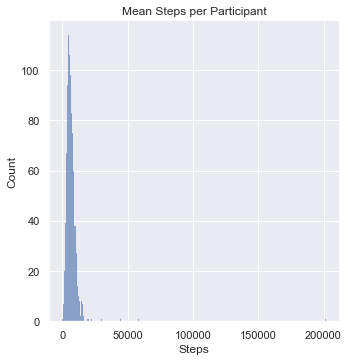

In [279]:
sns.displot(df['mean_steps'], kde=False) #Selecting the weight column. I need to drop the NA's for the plot
plt.title('Mean Steps per Participant')
plt.xlabel('Steps')
plt.show()

The next step is to remove the outliers. 

In [280]:
df02 = df[df['mean_steps']<70000]
df02.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


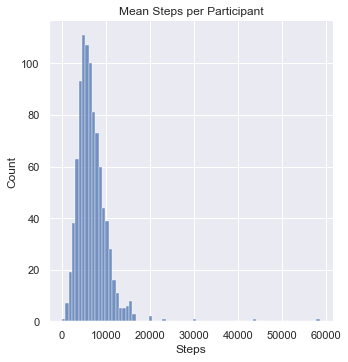

In [281]:
sns.displot(df02['mean_steps'].dropna(), kde=False) #Selecting the weight column. I need to drop the NA's for the plot
plt.title('Mean Steps per Participant')
plt.xlabel('Steps')
plt.show()

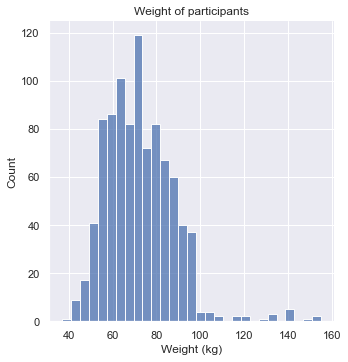

In [282]:
sns.displot(df['weight'].dropna(), kde=False) #Selecting the weight column. I need to drop the NA's for the plot
plt.title('Weight of participants')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

$BMI = kg/m^2$

In [283]:
df['height_m'] = df['height']/100 
df['height_m2'] = df['height_m']*df['height_m']
df['height_m2']

0      3.1684
1      3.2400
2      3.2400
3      3.1684
4      2.7889
        ...  
924    2.7225
925    3.6864
926    3.2761
927    2.9584
928    3.2400
Name: height_m2, Length: 929, dtype: float64

In [284]:
df['BMI'] = df['weight']/df['height_m2']
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_m,height_m2,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,1.78,3.1684,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,1.80,3.2400,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,1.80,3.2400,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,1.78,3.1684,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,1.67,2.7889,21.872423


In [285]:
df['mean_steps'].mean()

7036.627484984338

In [286]:
df['mean_steps'].mode()

0           4.000000
1         842.000000
2        1032.500000
3        1210.000000
4        1218.500000
           ...      
920     22842.716846
921     30373.808917
922     43912.307692
923     58491.067568
924    201722.600000
Length: 925, dtype: float64

In [287]:
df['mean_steps'].median()

6245.006060606061

In [288]:
df['mean_steps'].var()

54713819.05707054

/Users/mirceabalaban/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mirceabalaban/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_steps', ylabel='Density'>

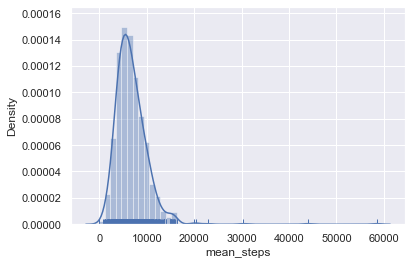

In [289]:
sns.distplot(df02['mean_steps'], rug=True)

<AxesSubplot:xlabel='age', ylabel='mean_steps'>

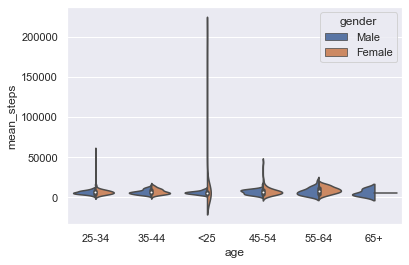

In [290]:
sns.violinplot(data=df, x="age", y="mean_steps", hue='gender',
               split=True)
#sns.despine(left=True)

Males have a walk more than females and males below 25 years old walk more than those above. 

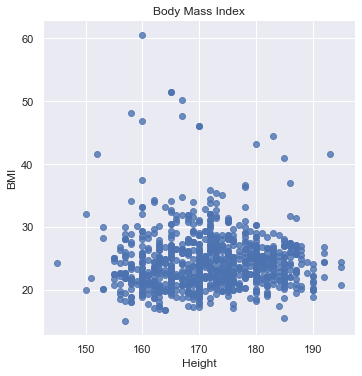

In [291]:
sns.lmplot(x='height', y='BMI', fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Height') #use matplotlib to refine Seaborn plot
plt.ylabel('BMI')
plt.title('Body Mass Index')
plt.show()

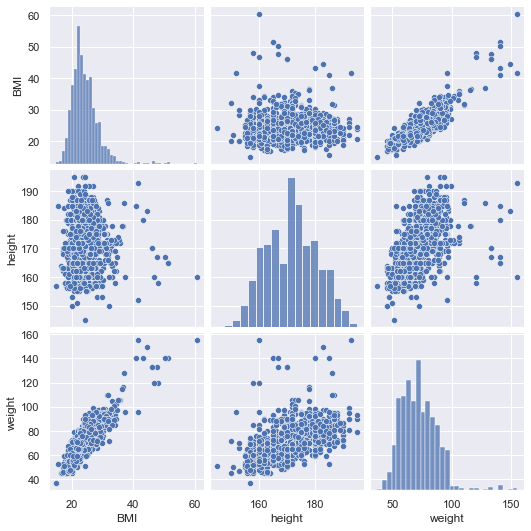

In [292]:
df_subset = df[['BMI', 'height', 'weight']]
sns.pairplot(df_subset)
plt.show()

In [293]:
df['overweight'] = df['BMI']>25
df.head(390)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_m,height_m2,BMI,overweight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,10205.521212,1.78,3.1684,30.930438,True
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5687.423313,1.80,3.2400,23.765432,False
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,1.80,3.2400,25.617284,True
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3633.200000,1.78,3.1684,25.249337,True
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5312.129630,1.67,2.7889,21.872423,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,Lille,Female,25-34,1,1,High school,166.0,57.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3960.676923,1.66,2.7556,20.685150,False
386,387,Lille,Male,35-44,1,1,Master or doctorate,187.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5597.782051,1.87,3.4969,26.594984,True
387,388,Lille,Female,25-34,2,2,Bachelor,158.0,45.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7837.067164,1.58,2.4964,18.025957,False
388,389,Lille,Male,35-44,3,4,Master or doctorate,172.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5585.580000,1.72,2.9584,20.619254,False


In [294]:
df[['mean_steps', 'BMI', 'height_m', 'overweight']].corr() 

,mean_steps,BMI,height_m,overweight
mean_steps,1.000000,0.017842,-0.069667,0.020985
BMI,0.017842,1.000000,0.023608,0.715632
height_m,-0.069667,0.023608,1.000000,0.081811
overweight,0.020985,0.715632,0.081811,1.000000


Describe the results here

Linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.

I'm taking the 'overweight' variable as a dummy variable, as it could help predict mean step per participant.

In [295]:
dummies = pd.get_dummies(df["overweight"])
dummies

,False,True
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
924,1,0
925,1,0
926,1,0
927,1,0


In [296]:
df = pd.concat([df, dummies], axis=1) 
df.head(391)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,11-5-2014,12-5-2014,13-5-2014,mean_steps,height_m,height_m2,BMI,overweight,False,True
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,10205.521212,1.78,3.1684,30.930438,True,0,1
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,5687.423313,1.80,3.2400,23.765432,False,1,0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,2567.0,1129.0,NaN,8301.729730,1.80,3.2400,25.617284,True,0,1
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,3633.200000,1.78,3.1684,25.249337,True,0,1
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,5312.129630,1.67,2.7889,21.872423,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,Lille,Male,35-44,1,1,Master or doctorate,187.0,93.0,NaN,...,NaN,NaN,NaN,5597.782051,1.87,3.4969,26.594984,True,0,1
387,388,Lille,Female,25-34,2,2,Bachelor,158.0,45.0,NaN,...,NaN,NaN,NaN,7837.067164,1.58,2.4964,18.025957,False,1,0
388,389,Lille,Male,35-44,3,4,Master or doctorate,172.0,61.0,NaN,...,NaN,NaN,NaN,5585.580000,1.72,2.9584,20.619254,False,1,0
389,390,Lille,Female,25-34,3,4,Vocational,156.0,NaN,NaN,...,NaN,NaN,NaN,15405.474490,1.56,2.4336,NaN,False,1,0


In [321]:
df = df[['BMI', 'mean_steps']].dropna()
X = df['BMI'].dropna() #to use sk-learn, we need to create lists of the two variables
y = df['mean_steps'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head(10) #The train data


470    21.049818
165    20.324438
169    34.049031
147    24.859074
208    23.889463
505    22.038401
190    21.967858
328    25.464011
834    22.992624
830    27.335640
Name: BMI, dtype: float64

In [322]:
y_train.head(10)

470     5757.865385
165     5677.627119
169     4091.089888
147     8425.101064
208     6752.772727
505     9275.500000
190     3628.629630
328     2487.875000
834    20414.067039
830     4671.500000
Name: mean_steps, dtype: float64

In [323]:
X_test.head(10)

280    22.718974
609    35.011230
318    25.306932
358    32.111952
183    18.670934
912    22.265625
289    21.913806
244    23.510204
788    22.600263
597    22.598140
Name: BMI, dtype: float64

In [324]:
lm = LinearRegression()

In [325]:
df['BMI'].round(decimals=8)
df.head(389)

,BMI,mean_steps
0,30.930438,10205.521212
1,23.765432,5687.423313
2,25.617284,8301.729730
3,25.249337,3633.200000
4,21.872423,5312.129630
...,...,...
388,20.619254,5585.580000
390,51.423324,3157.818182
391,27.660096,6076.748201
392,23.510204,3805.083333


In [328]:
lm.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[21.0498179  20.32443826 34.0490306  24.85907356 23.88946281 22.03840116
 21.96785756 25.46401086 22.99262444 27.33564014 21.4532872  26.59498413
 21.875      24.48565201 21.10726644 25.18078512 23.45091822 15.01075094
 24.9107674  20.2020202  27.99302203 23.05456246 21.2244898  24.35542118
 21.97133586 19.75308642 21.30681818 24.1671624  23.4375     29.7210791
 25.78125    20.9572742  29.41075887 40.90577064 21.96712018 21.0498179
 23.63403301 22.83737024 22.65625    23.52941176 22.265625   22.47658689
 18.51851852 17.75568182 25.81663021 25.14741589 22.03856749 24.34175829
 31.7955833  30.48668503 20.82999519 23.32341806 50.19900319 23.14049587
 24.28097534 32.         29.06574394 24.38652644 28.28282828 24.30248706
 23.54788069 23.88844098 20.61925365 24.03460984 22.72440348 22.85714286
 19.62323391 27.25088745 28.08163265 17.42674858 17.30103806 31.02040816
 28.16249373 26.53375883 23.12406059 22.4996371  20.01549587 33.74653346
 23.24340802 22.85714286 19.83516296 24.97704316 23.50780533 26.7755102
 21.46915048 21.21831719 25.46938776 22.22906193 23.52941176 17.91508924
 24.56747405 25.79591837 26.86120692 31.17913832 21.2962963  25.30864198
 20.83252961 26.54320988 22.22906193 24.22145329 23.52941176 23.4375
 24.18704649 22.22222222 27.1177686  20.01549587 18.49112426 18.67093431
 21.60410478 18.68512111 25.25951557 32.11195241 23.87511478 30.42184965
 23.7654321  23.62444749 20.703125   23.52941176 19.53125    20.19946976
 31.09789075 29.296875   21.56190926 22.92097107 23.51020408 24.61810377
 19.43301326 22.39541342 46.02076125 21.79944511 26.21882086 21.30394858
 22.92097107 28.71972318 22.13673973 26.07897153 26.61934339 23.03004535
 30.24691358 23.30109483 21.3577956  31.45643284 26.34649403 20.77580539
 22.49134948 24.62296091 22.85714286 20.70081674 26.06167931 28.73174689
 28.73467206 27.16691927 26.8744961  25.08286303 25.73708141 23.88844098
 19.37919743 20.41522491 18.20987654 24.1516725  21.77755334 18.82711104
 26.07897153 23.05456246 25.18078512 25.68007405 24.1671624  29.03673779
 22.65625    29.41075887 25.5588462  33.09042237 22.75830678 29.03673779
 23.83673469 26.88172043 25.68007405 21.88707637 29.41073492 26.7299275
 24.33747972 25.10239133 31.8877551  25.51020408 24.84098009 20.2020202
 21.30394858 21.71806609 23.93898977 28.04967129 22.30814991 21.87242282
 20.68515024 25.12783053 27.15271059 26.25958475 17.64705882 23.29122996
 18.68512111 23.183391   22.03172568 26.36560303 18.55677322 28.9340689
 23.51020408 17.14677641 20.76124567 20.52892163 24.97398543 28.65075614
 24.96494648 26.70362358 26.84061047 22.10028959 25.         20.38156971
 25.88057064 28.40054796 20.24489796 29.06060712 28.06642387 21.71806609
 23.51020408 22.47120876 22.65625    23.24598478 31.20917405 28.73469388
 23.45679012 22.1526465  27.76342975 21.63114885 26.53375883 26.85546875
 23.62444749 31.02040816 22.30935641 20.2020202  51.42332415 32.32323232
 22.05219018 26.4915082  26.29848784 20.24489796 22.92097107 24.22145329
 22.67573696 25.390625   23.14049587 21.62162162 21.63114885 22.95908766
 19.25702882 22.265625   31.5115017  22.85714286 24.44180209 21.4532872
 20.70081674 30.46111831 25.30864198 20.81165453 21.73353542 22.79032897
 33.13975508 25.95155709 24.09972299 21.33821064 27.45982194 26.17383255
 24.11403803 19.44444444 26.59498413 19.53125    23.66863905].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [305]:
#y_test_p = lm.predict(X_test)

I am lost here, don't understand why I can't create the linear regression. Maybe until Friday I will figure it out. 
